In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

In [10]:
# Load dataset
df = pd.read_csv('../../data/raw/03_Wheat_Seeds.csv')

# Display basic info
print("Dataset Overview:")
display(df.head())
display(df.info())
display(df.describe())

Dataset Overview:


,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            199 non-null    float64
 1   Perimeter       199 non-null    float64
 2   Compactness     199 non-null    float64
 3   Length          199 non-null    float64
 4   Width           199 non-null    float64
 5   AsymmetryCoeff  199 non-null    float64
 6   Groove          199 non-null    float64
 7   Type            199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


None

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [11]:
# Check for missing values
print("Missing Values:")
display(df.isnull().sum())


Missing Values:


Area              0
Perimeter         0
Compactness       0
Length            0
Width             0
AsymmetryCoeff    0
Groove            0
Type              0
dtype: int64

In [12]:
# Check class distribution
print("Class Distribution:")
display(df['Type'].value_counts())


Class Distribution:


Type
2    68
1    66
3    65
Name: count, dtype: int64

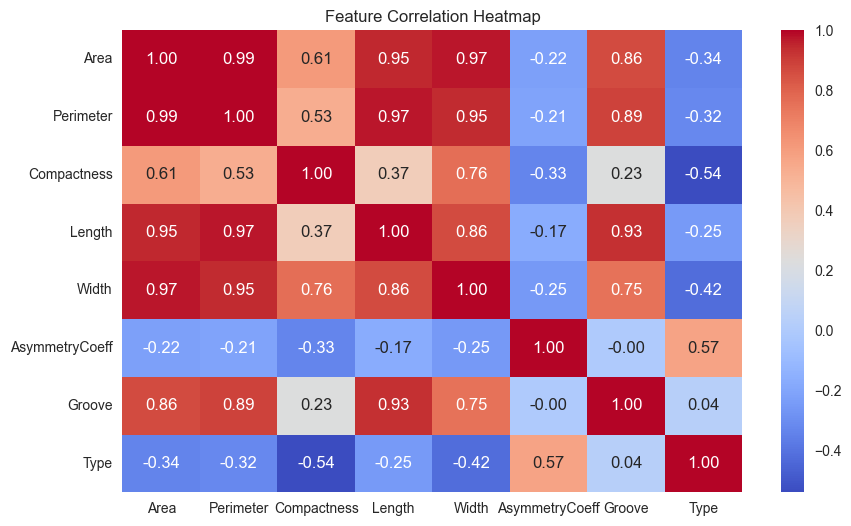

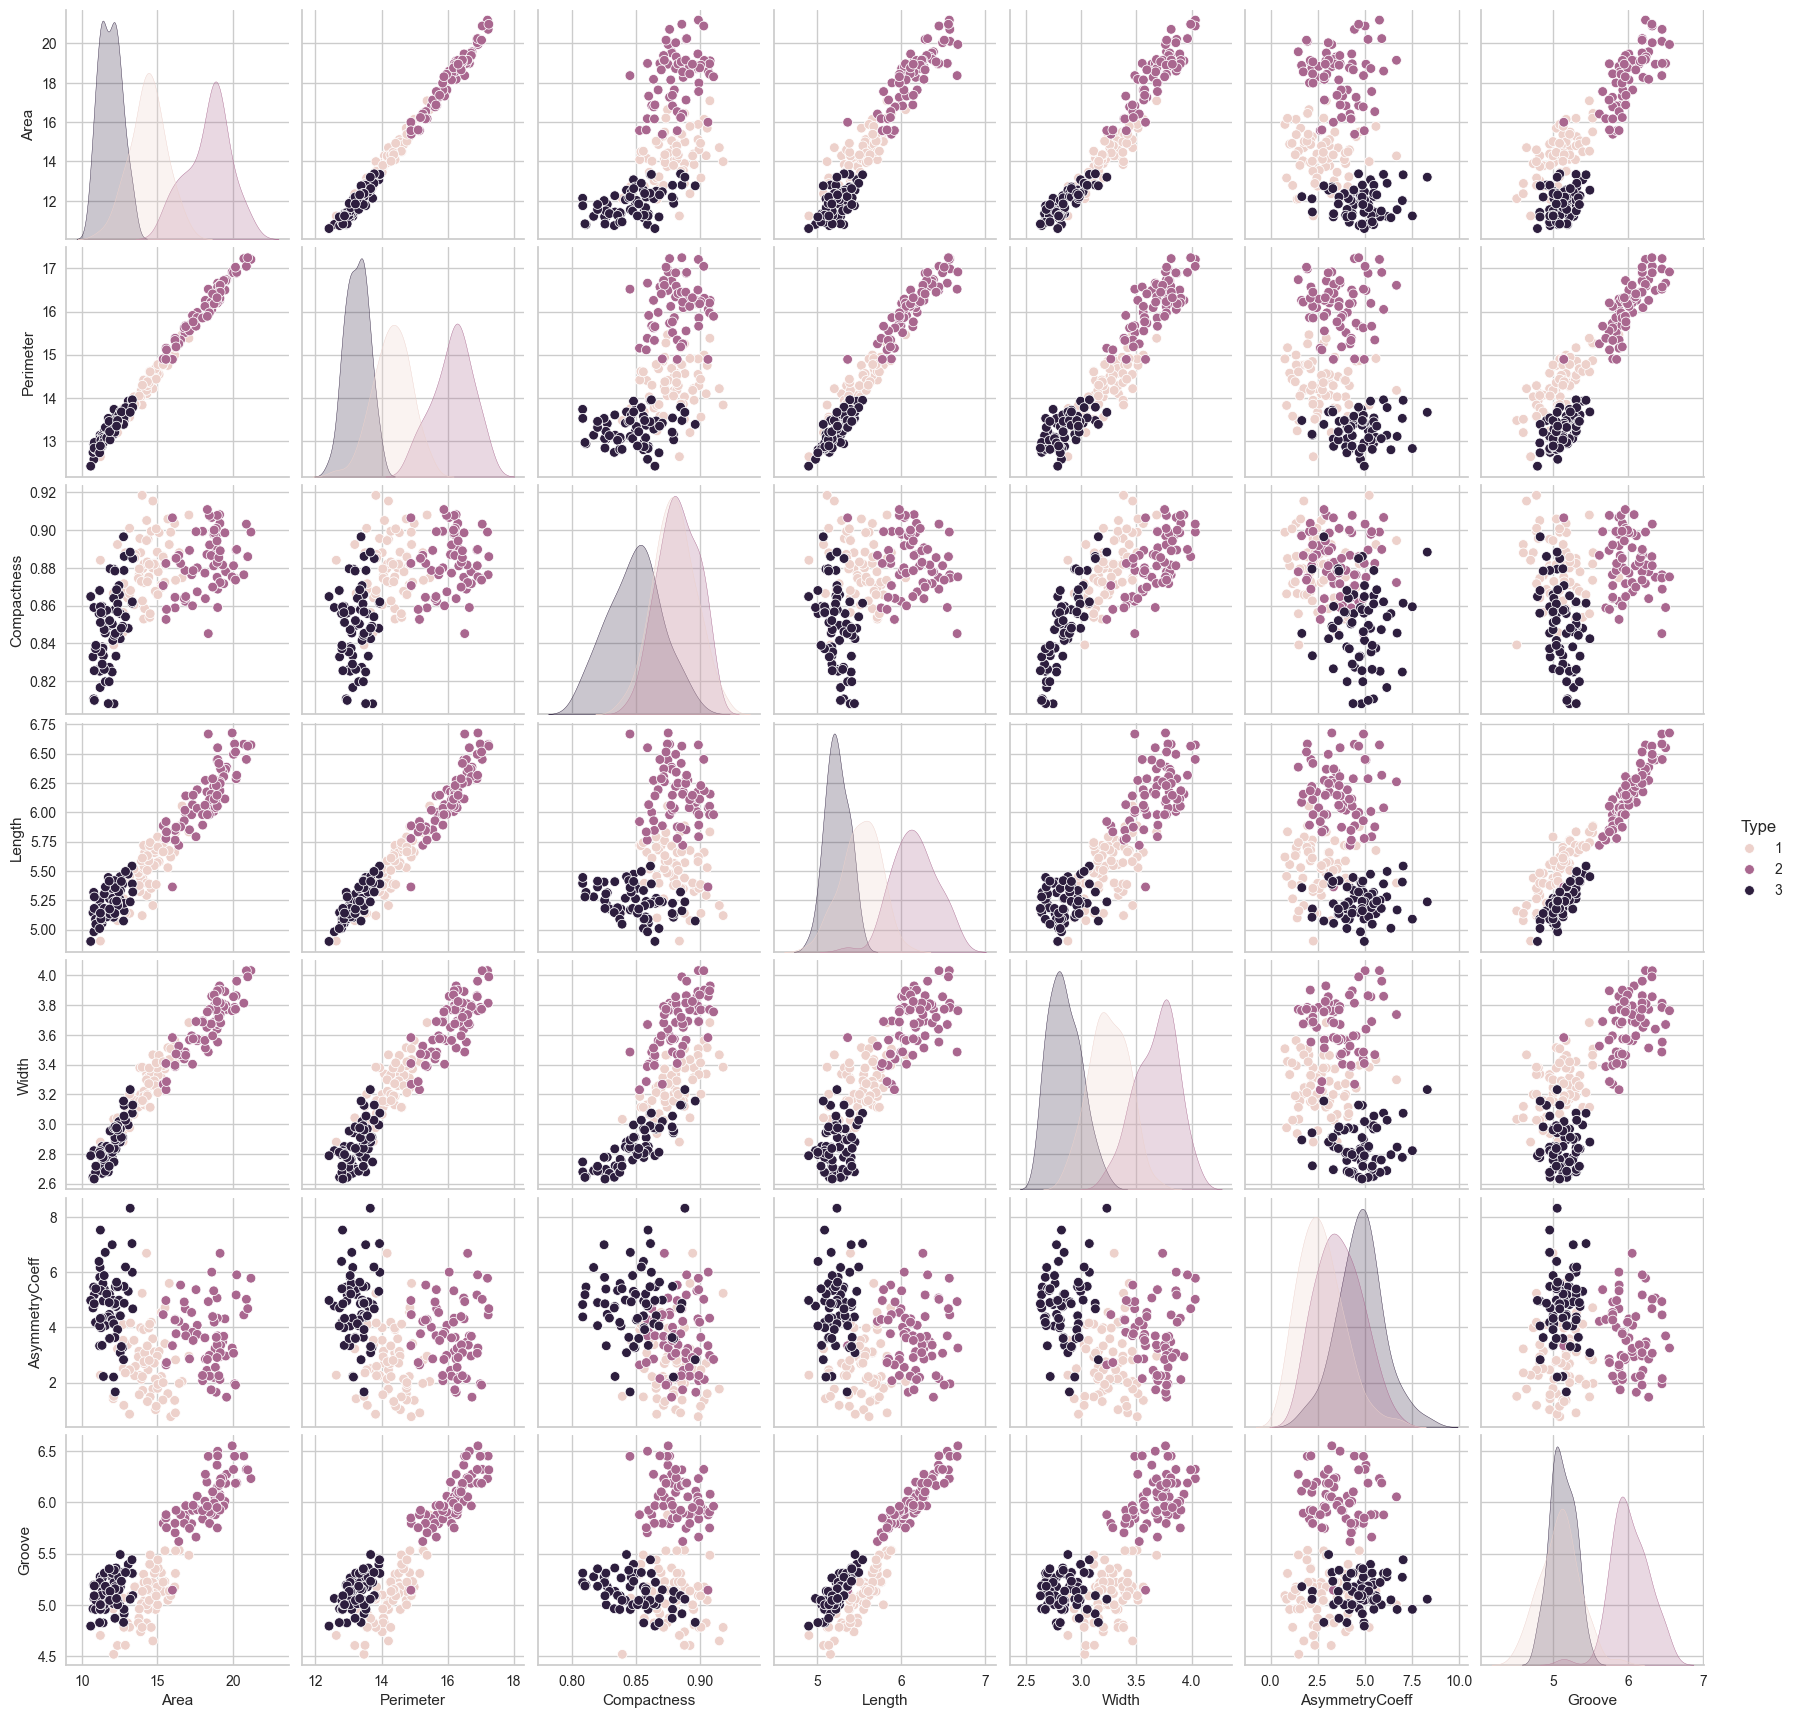

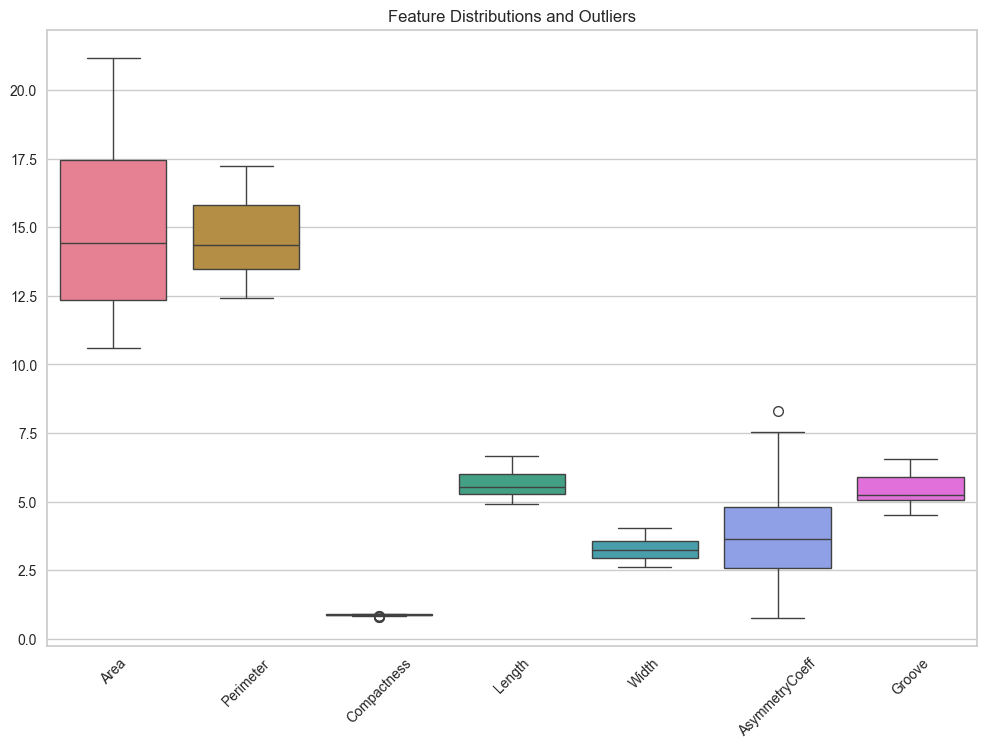

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df, hue='Type', diag_kind='kde')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['Type']))
plt.xticks(rotation=45)
plt.title("Feature Distributions and Outliers")
plt.show()

In [14]:
# Normalize and scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

## Task 2: PyCaret ML Pipeline

In [15]:
clf = setup(data=df, target='Type', session_id=42,
            normalize=True, 
            transformation=True,
            feature_selection=True,
            fix_imbalance=True,
            log_experiment=False,  # Disable logging
            experiment_name="wheat_classification")


,Description,Value
0,Session id,42
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(204, 2)"
6,Transformed train set shape,"(144, 2)"
7,Transformed test set shape,"(60, 2)"
8,Numeric features,7
9,Preprocess,True


In [16]:
# Compare models
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7055,0.8226,0.7055,0.7094,0.6770,0.5584,0.5921,0.0810
qda,Quadratic Discriminant Analysis,0.6984,0.0000,0.6984,0.7012,0.6681,0.5472,0.5823,0.1230
ada,Ada Boost Classifier,0.6984,0.0000,0.6984,0.6645,0.6377,0.5479,0.6168,0.1340
lr,Logistic Regression,0.6632,0.0000,0.6632,0.6587,0.6528,0.4931,0.4991,1.3050
lda,Linear Discriminant Analysis,0.6626,0.0000,0.6626,0.6581,0.6508,0.4919,0.4992,0.0880
et,Extra Trees Classifier,0.6549,0.7772,0.6549,0.6587,0.6458,0.4836,0.4931,0.1260
dt,Decision Tree Classifier,0.6544,0.7571,0.6544,0.6650,0.6440,0.4832,0.4963,0.0770
gbc,Gradient Boosting Classifier,0.6544,0.0000,0.6544,0.6674,0.6393,0.4815,0.4980,0.2070
svm,SVM - Linear Kernel,0.6478,0.0000,0.6478,0.5656,0.5754,0.4676,0.5424,0.0760
xgboost,Extreme Gradient Boosting,0.6412,0.8206,0.6412,0.6417,0.6338,0.4608,0.4708,0.0880


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6206,0.5000,0.4881,0.4605,0.2576,0.2722
1,0.6429,0.7889,0.6429,0.6582,0.6150,0.4737,0.5087
2,0.5714,0.7587,0.5714,0.5714,0.5607,0.3636,0.3750
3,0.7143,0.9095,0.7143,0.7143,0.7143,0.5692,0.5692
4,0.7143,0.8730,0.7143,0.8413,0.6599,0.5692,0.6556
5,0.6429,0.6825,0.6429,0.4643,0.5238,0.4615,0.5883
6,0.8571,0.8718,0.8571,0.8980,0.8452,0.7812,0.8074
7,0.7857,0.8571,0.7857,0.7857,0.7801,0.6744,0.6798
8,0.8571,0.9321,0.8571,0.8980,0.8452,0.7812,0.8074


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6206,0.5000,0.4881,0.4605,0.2576,0.2722
1,0.6429,0.7889,0.6429,0.6582,0.6150,0.4737,0.5087
2,0.5714,0.7587,0.5714,0.5714,0.5607,0.3636,0.3750
3,0.7143,0.9095,0.7143,0.7143,0.7143,0.5692,0.5692
4,0.7143,0.8730,0.7143,0.8413,0.6599,0.5692,0.6556
5,0.6429,0.6825,0.6429,0.4643,0.5238,0.4615,0.5883
6,0.8571,0.8718,0.8571,0.8980,0.8452,0.7812,0.8074
7,0.7857,0.8571,0.7857,0.7857,0.7801,0.6744,0.6798
8,0.8571,0.9321,0.8571,0.8980,0.8452,0.7812,0.8074


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

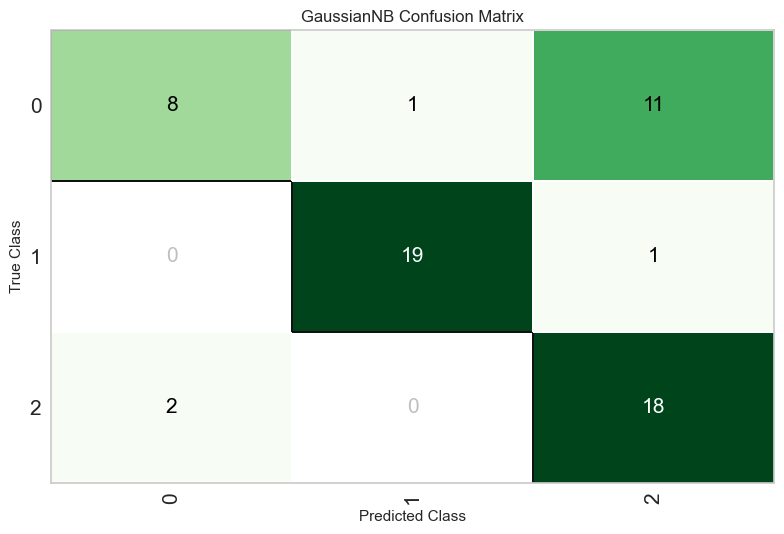

In [17]:
from pycaret.classification import *  # Import pycaret for classification

# Create and tune the model
model = create_model('nb', fold=10)  # Naive Bayes model
tuned_model = tune_model(model, fold=10)  # Tuned version of the Naive Bayes model

# Evaluate the model
evaluate_model(tuned_model)  # Use the tuned model for evaluation

# Plot the confusion matrix
plot_model(tuned_model, plot='confusion_matrix')  # Plot confusion matrix for the tuned model



In [18]:
# Assign the tuned model to final_model
final_model = tuned_model

# Generate predictions on the same dataset used for training
predictions = predict_model(final_model, data=df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7337,0.8604,0.7337,0.7498,0.7216,0.6009,0.6195


In [19]:

# Optional: Finalize the model (if needed)
final_model = finalize_model(final_model)  # Finalizing the tuned model

# Save the final model
save_model(final_model, 'wheat_classifier_pipeline')  # Save under your desired name

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter', 'Compactness',
                                              'Length', 'Width',
                                              'AsymmetryCoeff', 'Groove'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_va...
                                                                                          min_child_weight=0.001,
                                                                                          min_split_gain=0.0,
  

In [21]:
# To confirm if the model is loaded correctly
loaded_model_pipeline = load_model('wheat_classifier_pipeline')  # Use your saved model's name here
loaded_model_pipeline  # Display the loaded model


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Gabriel\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Area', 'Perimeter', 'Compactness',
                                             'Length', 'Width',
                                             'AsymmetryCoeff', 'Groove'],
                                    transformer=SimpleImp...
                                                                                         min_child_weight=0.001,
                                                                                         min_split_gain=0.0,
                                                                                         n_estimators=100,
                                                                                         n_jobs=None,
                                                                                         num_leaves=31,
                                                                                         objective=None,
                                                                                         random_state=None,
                                                                                         reg_alpha=0.0,
                                                                                         reg_lambda=0.0,
                                                                                         subsample=1.0,
                                                                                         subsample_for_bin=200000,
                                                                                         subsample_freq=0),
                                                                importance_getter='auto',
                                                                max_features=1,
                                                                norm_order=1,
                                                                prefit=False,
                                                                threshold=-inf))),
                ('actual_estimator',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [33]:
import dagshub
dagshub.init(repo_owner='gangula-karthik', repo_name='MLOps-Assignment', mlflow=True)
final_best = finalize_model(final_model)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=8d69b7b3-7e88-456b-aedf-8fe36207311d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=2bc15b39653fb86018942018e9e8fe31b582314edad4d0c4aa834f1e7b3d4cd6




Accessing as loheegenegabriel

Repository MLOps-Assignment doesn't exist, creating it under current user.

Initialized MLflow to track repo "gangula-karthik/MLOps-Assignment"

Repository gangula-karthik/MLOps-Assignment initialized!

In [34]:
metrics_df = pull()
metrics_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7337,0.8604,0.7337,0.7498,0.7216,0.6009,0.6195


In [35]:
# Adjusting the column indices based on your result
accuracy = metrics_df.iloc[0, 1]
auc = metrics_df.iloc[0, 2]
recall = metrics_df.iloc[0, 3]
precision = metrics_df.iloc[0, 4]
f1_score = metrics_df.iloc[0, 5]
kappa = metrics_df.iloc[0, 6]
mcc = metrics_df.iloc[0, 7]

accuracy, auc, recall, precision, f1_score, kappa, mcc


(0.7337, 0.8604, 0.7337, 0.7498, 0.7216, 0.6009, 0.6195)

In [36]:
mlflow.end_run()

In [42]:
mlflow.set_tracking_uri("http://localhost:5000")


In [46]:
# Start the MLflow run to log parameters and metrics
with mlflow.start_run():
    mlflow.log_param("model_type", "scikit-learn pipeline")

    # Log the metrics for the model
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1_score)
    mlflow.log_metric("kappa", kappa)
    mlflow.log_metric("mcc", mcc)

    # Log the model to MLflow and extract model URI correctly
    model_info = mlflow.sklearn.log_model(final_best, "wheat_clssifier_pipeline")
    model_uri = model_info.model_uri  # Extract the URI explicitly

    # Register the model in the MLflow Model Registry
    model_details = mlflow.register_model(
        model_uri=model_uri,  
        name="WheatSeedModel_Gabriel"
    )

    # Print success message
    print("Model and metrics successfully logged to MLflow on DAGsHub!")


2025/02/26 21:55:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'WheatSeedModel_Gabriel' already exists. Creating a new version of this model...
2025/02/26 21:55:15 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: WheatSeedModel_Gabriel, version 1


Model and metrics successfully logged to MLflow on DAGsHub!
🏃 View run unruly-fish-804 at: http://localhost:5000/#/experiments/0/runs/56167d5f6c3c4954a48dcb8f67df9c53
🧪 View experiment at: http://localhost:5000/#/experiments/0


Created version '1' of model 'WheatSeedModel_Gabriel'.


In [47]:
MODEL_NAME = "WheatSeedModel_Gabriel"
MODEL_VERSION = "latest"  # You can specify a version like "1" if needed
model = mlflow.sklearn.load_model(f"models:/{MODEL_NAME}/{MODEL_VERSION}")
model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Area', 'Perimeter', 'Compactness',
                                             'Length', 'Width',
                                             'AsymmetryCoeff', 'Groove'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_va...
                                                                                         min_child_weight=0.001,
                                                                                         min_split_gain=0.0,
                                                                                         n_estimators=100,
                                                                                         n_jobs=None,
                                                                                         num_leaves=31,
                                                                                         objective=None,
                                                                                         random_state=None,
                                                                                         reg_alpha=0.0,
                                                                                         reg_lambda=0.0,
                                                                                         subsample=1.0,
                                                                                         subsample_for_bin=200000,
                                                                                         subsample_freq=0),
                                                                importance_getter='auto',
                                                                max_features=1,
                                                                norm_order=1,
                                                                prefit=False,
                                                                threshold=-inf))),
                ('actual_estimator',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)